# Artificial Neural Networks and Deep Learning



---



## Homework 1



To make your first submission, follow these steps:

1. Create a folder named `[2024-2025] AN2DL/Homework 1` in your Google Drive.

2. Upload the `training_set.npz` file to this folder.

3. Upload the Jupyter notebook `Homework 1 - Minimal Working Example.ipynb`.

4. Load and process the data.

5. Implement and train your model.

6. Submit the generated `.zip` file to Codabench.

In [1]:
from google.colab import drive



drive.mount('/gdrive')

#%cd /gdrive/My Drive/Colab Notebooks/AN2DL/ShareFolder/Models/ResNet50 - Irene
%cd /gdrive/My Drive/Boracchi

#directory of my folder in google drive

MessageError: Error: credential propagation was unsuccessful

## ⚙️ Import Libraries

In [ ]:
seed = 85 # random variable to make the code reproducible



# Import necessary libraries

import os



# Set environment variables before importing modules

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

os.environ['PYTHONHASHSEED'] = str(seed)

os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'



# Suppress warnings

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

warnings.simplefilter(action='ignore', category=Warning)



# Import necessary modules

import numpy as np

import hashlib

import logging

import random



# Set seeds for random number generators in NumPy and Python

np.random.seed(seed)

random.seed(seed)



# Import TensorFlow and Keras

import tensorflow as tf

from tensorflow import keras as tfk

from tensorflow.keras import layers as tfkl



# Set seed for TensorFlow

tf.random.set_seed(seed)

tf.compat.v1.set_random_seed(seed)



# Reduce TensorFlow verbosity

tf.autograph.set_verbosity(0)

tf.get_logger().setLevel(logging.ERROR)

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)



# Print TensorFlow version

print(tf.__version__)



# Import other libraries

import matplotlib.pyplot as plt

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

from sklearn.utils.class_weight import compute_class_weight

import seaborn as sns

from PIL import Image

import matplotlib.gridspec as gridspec



# Configure plot display settings

sns.set(font_scale=1.4)

sns.set_style('white')

plt.rc('font', size=14)

%matplotlib inline

2.16.1


## ⏳ Load the Data

In [ ]:
data = np.load('training_set_cleaned.npz') # load the blood cells dataset into a variable called 'data'

print(data.files)

# as we can see in the previus output, the dataset is composed by two arrays: images and labels

['images', 'labels']


In [ ]:
# Define a mapping of labels to their corresponding digit names

classes = {0:'Basophil', 1:'Eosinophil', 2:'Erythroblast', 3:'Immature granulocytes', 4:'Lymphocyte', 5:'Monocyte', 6:'Neutrophil', 7:'Platelet'} # 8 classes

# Save unique labels

unique_labels = list(classes.values())

In [ ]:
# splitting between images and labels

X = data['images']

y = data['labels']

print(X.shape)

print(y.shape)

(11353, 96, 96, 3)
(11353, 1)


In [ ]:
print(X.min(), X.max())

0 255


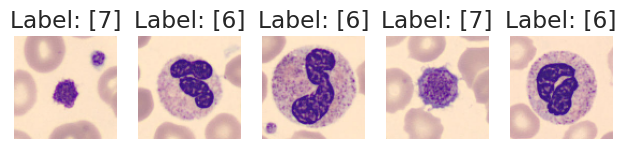

In [ ]:
for i in range(5):

    plt.subplot(1, 5, i + 1)  # Arrange plots in a single row

    plt.imshow(X[i])  # Display image, adjust cmap if images are in grayscale

    plt.title(f"Label: {y[i]}")

    plt.axis('off')  # Remove axes for better visibility



plt.tight_layout()

plt.show()

# Train and test set

In [ ]:
# keeping 80% for the training set and 20% for the validation

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



print("Train:", X_train.shape, y_train.shape)

print("Validation:", X_val.shape, y_val.shape)

Train: (9082, 96, 96, 3) (9082, 1)
Validation: (2271, 96, 96, 3) (2271, 1)


## Data Balancing

In [ ]:
# compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train.ravel())

class_weight_dict = dict(zip(np.unique(y_train), class_weights))

class_weight_dict

{0: 1.733206106870229,
 1: 0.6741389548693587,
 2: 1.3827649208282582,
 3: 0.8214544138929089,
 4: 1.6918777943368106,
 5: 1.5403663500678426,
 6: 0.6227372462973121,
 7: 0.8672650878533231}

In [ ]:
# Convert labels to categorical format using one-hot encoding

y_train = y_train.flatten()

y_val = y_val.flatten()

y_train

array([0, 6, 5, ..., 7, 1, 6], dtype=uint8)

## Network Parameters

In [ ]:
input_shape = (96,96,3) # input shape our dataset

output_shape = len(np.unique(y_train)) # output shape: 8 classes

print("Input Shape:", input_shape)

print("Output Shape:", output_shape)



# it makes sense because the input shape is the dimension of the image and 3 channels

# and the output is 8 as the number of the possible classes

Input Shape: (96, 96, 3)
Output Shape: 8


In [ ]:
epochs = 300 # epochs

batch_size = 64 # batch

learning_rate = 0.00001 # step size for updating the model's weights

In [ ]:
# early stopping

patience = 30



early_stopping = tfk.callbacks.EarlyStopping(

    monitor = 'val_loss',

    mode = 'min',

    patience = patience,

    restore_best_weights = True

)



callbacks = [early_stopping]

## 🛠️ Train and Save the Model - ResNet50

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input

X_train = preprocess_input(X_train)  # Preprocessing manuale

X_val = preprocess_input(X_val)

In [ ]:
from tensorflow.keras.applications import ResNet50

from tensorflow.keras.models import Model



# Initialise ResNet50 model with pretrained weights, for transfer learning

resnet50 = tfk.applications.ResNet50(

    include_top=False,

    weights="imagenet",

    input_shape=input_shape
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
from tensorflow.keras.models import Model

# Re-load the model after transfer learning

ft_model = tfk.models.load_model('weights.keras')


# Display a summary of the model architecture

ft_model.summary(expand_nested=True)

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ preprocessing (Sequential)      │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ random_flip_1 (RandomFlip) │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ random_translation_1       │ (None, 96, 96, 3)      │             0 │
│ (RandomTranslation)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ random_rotation_1          │ (None, 96, 96, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 3, 3, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ input_layer_2 (InputLayer) │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv1_pad (ZeroPadding2D)  │ (None, 102, 102, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv1_conv (Conv2D)        │ (None, 48, 48, 64)     │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv1_bn                   │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv1_relu (Activation)    │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ pool1_pad (ZeroPadding2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ pool1_pool (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2_block1_1_conv        │ (None, 24, 24, 64)     │         4,160 │
│ (Conv2D)                        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2_block1_1_bn          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2_block1_1_relu        │ (None, 24, 24, 64)     │             0 │
│ (Activation)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2_block1_2_conv        │ (None, 24, 24, 64)     │        36,928 │
│ (Conv2D)                        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2_block1_2_bn          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2_block1_2_relu        │ (None, 24, 24, 64)     │             0 │
│ (Activation)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2_block1_0_conv        │ (None, 24, 24, 256)    │        16,640 │
│ (Conv2D)                        │                        │             

 Total params: 36,066,458 (137.58 MB)

 Trainable params: 5,648,136 (21.55 MB)

 Non-trainable params: 19,122,048 (72.94 MB)

 Optimizer params: 11,296,274 (43.09 MB)

In [ ]:
# Unfreezing the last 10 layers of the base model (one block)

for layer in ft_model.get_layer('resnet50').layers[-10:]:

    layer.trainable = True





# Step 2: Recompile the model with a lower learning rate

ft_model.compile(

    loss=tfk.losses.SparseCategoricalCrossentropy(),

    optimizer=tfk.optimizers.Lion(learning_rate=learning_rate),  # Lower learning rate for fine-tuning

    metrics=['accuracy']

)

# Display a summary of the model architecture

ft_model.summary(expand_nested=True)

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ preprocessing (Sequential)      │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ random_flip_1 (RandomFlip) │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ random_translation_1       │ (None, 96, 96, 3)      │             0 │
│ (RandomTranslation)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ random_rotation_1          │ (None, 96, 96, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 3, 3, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ input_layer_2 (InputLayer) │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv1_pad (ZeroPadding2D)  │ (None, 102, 102, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv1_conv (Conv2D)        │ (None, 48, 48, 64)     │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv1_bn                   │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv1_relu (Activation)    │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ pool1_pad (ZeroPadding2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ pool1_pool (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2_block1_1_conv        │ (None, 24, 24, 64)     │         4,160 │
│ (Conv2D)                        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2_block1_1_bn          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2_block1_1_relu        │ (None, 24, 24, 64)     │             0 │
│ (Activation)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2_block1_2_conv        │ (None, 24, 24, 64)     │        36,928 │
│ (Conv2D)                        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2_block1_2_bn          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2_block1_2_relu        │ (None, 24, 24, 64)     │             0 │
│ (Activation)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2_block1_0_conv        │ (None, 24, 24, 256)    │        16,640 │
│ (Conv2D)                        │                        │             

 Total params: 24,770,184 (94.49 MB)

 Trainable params: 5,648,136 (21.55 MB)

 Non-trainable params: 19,122,048 (72.94 MB)

In [ ]:
# Train the model

history = ft_model.fit(

    x=X_train,

    y=y_train,

    batch_size=batch_size,

    epochs=epochs,

    class_weight=class_weight_dict,

    validation_data=(X_val, y_val),

    callbacks=callbacks

).history



# Calculate and print the best validation accuracy achieved

final_val_accuracy = round(max(history['val_accuracy']) * 100, 2)

print(f'Final validation accuracy: {final_val_accuracy}%')

Epoch 1/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 26s 103ms/step - accuracy: 0.6416 - loss: 1.4346 - val_accuracy: 0.8155 - val_loss: 0.6344
Epoch 2/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.8386 - loss: 0.5047 - val_accuracy: 0.8547 - val_loss: 0.4774
Epoch 3/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.8730 - loss: 0.3869 - val_accuracy: 0.8705 - val_loss: 0.4084
Epoch 4/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step - accuracy: 0.8936 - loss: 0.3137 - val_accuracy: 0.8877 - val_loss: 0.3404
Epoch 5/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.9028 - loss: 0.3007 - val_accuracy: 0.8970 - val_loss: 0.2996
Epoch 6/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.9082 - loss: 0.2639 - val_accuracy: 0.9115 - val_loss: 0.2581
Epoch 7/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.9176 - loss: 0.2550 - val_accuracy: 0.8926 - val_loss: 0.3473
Epoch 8/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9134 - loss: 

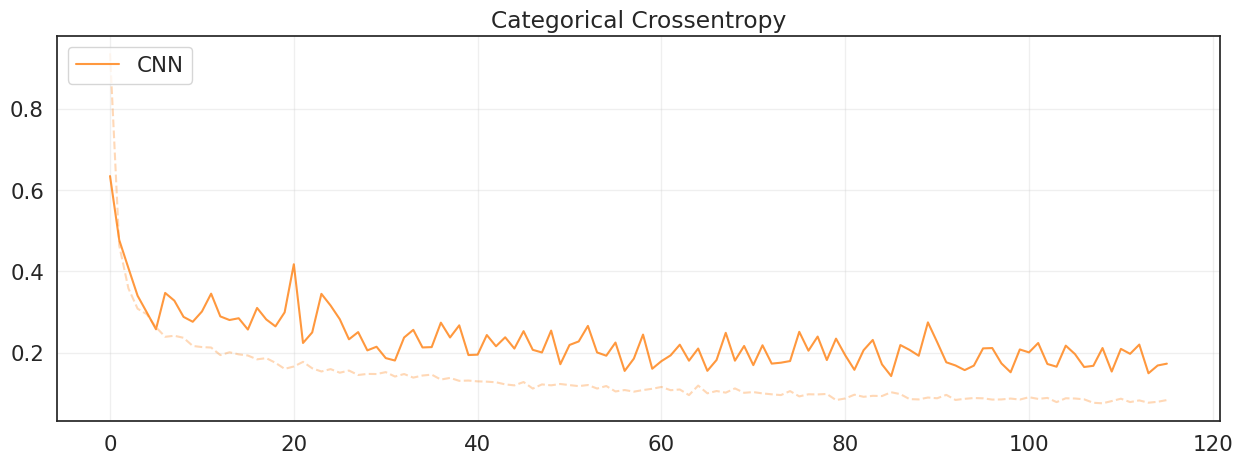

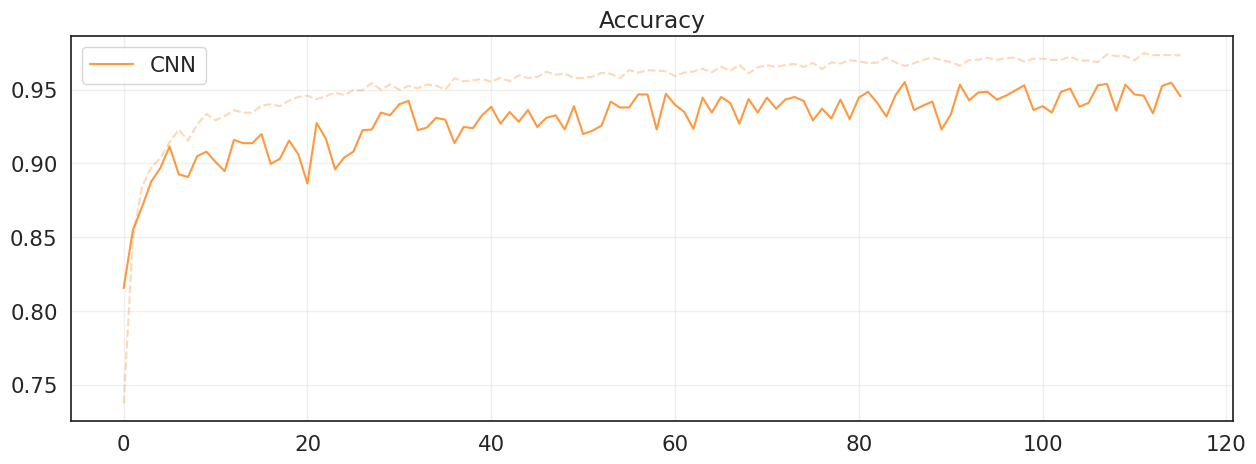

In [ ]:
# Plot the training

plt.figure(figsize=(15,5))

plt.plot(history['loss'], alpha=.3, color='#ff7f0e', linestyle='--')

plt.plot(history['val_loss'], label='CNN', alpha=.8, color='#ff7f0e')

plt.legend(loc='upper left')

plt.title('Categorical Crossentropy')

plt.grid(alpha=.3)



plt.figure(figsize=(15,5))

plt.plot(history['accuracy'], alpha=.3, color='#ff7f0e', linestyle='--')

plt.plot(history['val_accuracy'], label='CNN', alpha=.8, color='#ff7f0e')

plt.legend(loc='upper left')

plt.title('Accuracy')

plt.grid(alpha=.3)

In [ ]:
# Predict probabilities for the test set

y_prob= ft_model.predict(X_val)
y_pred = y_prob.argmax(axis=1)

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step


In [ ]:
# Save model
ft_model.save('FT_ResNet50.keras')

### Validation set metrics

Accuracy: 0.9551
F1 Score: 0.9551

Classification Report:
               precision    recall  f1-score   support

           0     0.8703    0.9938    0.9280       162
           1     0.9855    0.9855    0.9855       414
           2     0.9571    0.9738    0.9654       229
           3     0.8901    0.8952    0.8927       353
           4     0.9560    0.9268    0.9412       164
           5     0.9688    0.8757    0.9199       177
           6     0.9756    0.9606    0.9680       457
           7     1.0000    1.0000    1.0000       315

    accuracy                         0.9551      2271
   macro avg     0.9504    0.9514    0.9501      2271
weighted avg     0.9562    0.9551    0.9551      2271



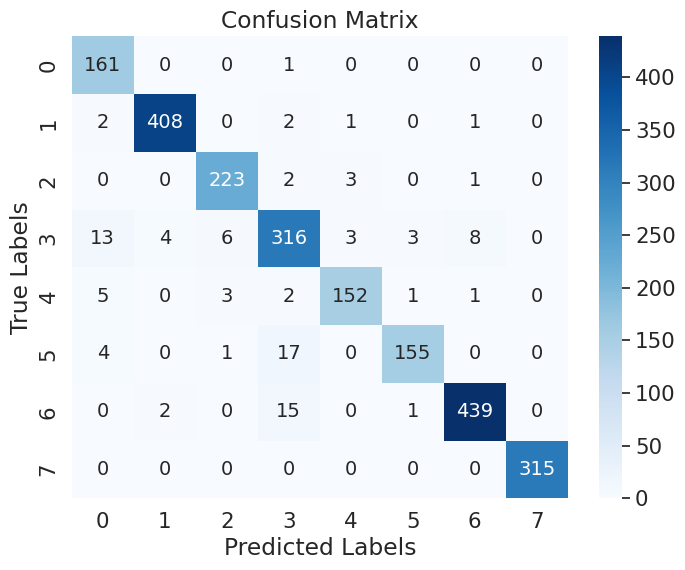

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score



# Calculate metrics

accuracy = accuracy_score(y_val, y_pred)

f1 = f1_score(y_val, y_pred, average='weighted')



# Print the results

print(f"Accuracy: {accuracy:.4f}")

print(f"F1 Score: {f1:.4f}")



# Detailed per-class metrics

print("\nClassification Report:\n", classification_report(y_val, y_pred, digits = 4))



# Compute confusion matrix

cm = confusion_matrix(y_val, y_pred)



# Create a heatmap for the confusion matrix

plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(cm.shape[1]), yticklabels=np.arange(cm.shape[0]))

plt.title('Confusion Matrix')

plt.xlabel('Predicted Labels')

plt.ylabel('True Labels')



# Display the plot

plt.show()

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)

print("Distribuzione delle classi nei dati di training:", dict(zip(unique, counts)))

Distribuzione delle classi nei dati di training: {0: 655, 1: 1684, 2: 821, 3: 1382, 4: 671, 5: 737, 6: 1823, 7: 1309}


In [ ]:
%%writefile model.py

import numpy as np



import tensorflow as tf

from tensorflow import keras as tfk

from tensorflow.keras import layers as tfkl





class Model:

    def __init__(self):

        """

        Initialize the internal state of the model. Note that the __init__

        method cannot accept any arguments.



        The following is an example loading the weights of a pre-trained

        model.

        """

        self.neural_network = tfk.models.load_model('FT_ResNet50.keras')



    def predict(self, X):

        """

        Predict the labels corresponding to the input X. Note that X is a numpy

        array of shape (n_samples, 96, 96, 3) and the output should be a numpy

        array of shape (n_samples,). Therefore, outputs must no be one-hot

        encoded.



        The following is an example of a prediction from the pre-trained model

        loaded in the __init__ method.

        """

        preds = self.neural_network.predict(X)

        if len(preds.shape) == 2:

            preds = np.argmax(preds, axis=1)

        return preds

Writing model.py


In [ ]:
from datetime import datetime
filename = f'submission_{datetime.now().strftime("%y%m%d_%H%M%S")}.zip'

# Add files to the zip command if needed
!zip {filename} model.py weights.keras

from google.colab import files
files.download(filename)

  adding: model.py (deflated 56%)
  adding: FT_ResNet50.keras (deflated 9%)
File salvato come /kaggle/working//submission_241121_113133.zip
